# Foundations for statistical inference - Confidence intervals
# Sampling from Ames, Iowa
If you have access to data on an entire population, say the size of every house in Ames, Iowa, it’s straight forward to answer questions like, “How big is the typical house in Ames?” and “How much variation is there in sizes of houses?”. If you have access to only a sample of the population, as is often the case, the task becomes more complicated. What is your best guess for the typical size if you only know the sizes of several dozen houses? This sort of situation requires that you use your sample to make inference on what your population looks like.

The data
In the previous lab, 'Sampling Distributions', we looked at the population data of houses from Ames, Iowa. Let’s start by loading that data set.

In [1]:
import pandas as pd
ames = pd.read_csv('ames.csv')

In this lab we’ll start with a simple random sample of size 60 from the population. Specifically, this is a simple random sample of size 60. Note that the data set has information on many housing variables, but for the first portion of the lab we’ll focus on the size of the house, represented by the variable `Gr.Liv.Area`.

In [2]:
population = ames['Gr.Liv.Area']
samp = population.sample(60)

**Exercise 1** Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.

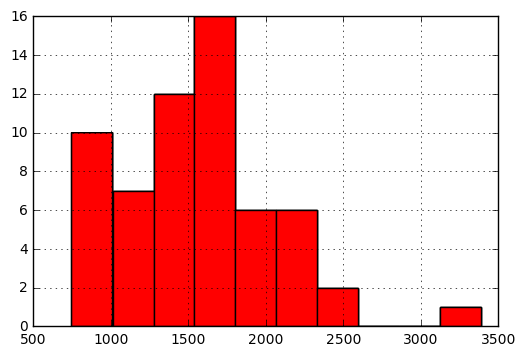

In [5]:
import matplotlib.pyplot as plt
samp.hist()
plt.show()

In [6]:
samp.mean()

1558.3666666666666

**Exercise 2** Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?

# Confidence intervals
One of the most common ways to describe the typical or central value of a distribution is to use the mean. In this case we can calculate the mean of the sample using,

In [7]:
sample_mean = samp.mean()

Return for a moment to the question that first motivated this lab: based on this sample, what can we infer about the population? Based only on this single sample, the best estimate of the average living area of houses sold in Ames would be the sample mean, usually denoted as $\bar{x}$ (here we’re calling it sample_mean). That serves as a good point estimate but it would be useful to also communicate how uncertain we are of that estimate. This can be captured by using a confidence interval.

We can calculate a 95% confidence interval for a sample mean by adding and subtracting 1.96 standard errors to the point estimate (See Section 4.2.3 if you are unfamiliar with this formula).

In [9]:
import math
se = samp.std() / math.sqrt(60)
lower = sample_mean - 1.96 * se
upper = sample_mean + 1.96 * se
[lower, upper]

[1434.2759212455076, 1682.4574120878256]

This is an important inference that we’ve just made: even though we don’t know what the full population looks like, we’re 95% confident that the true average size of houses in Ames lies between the values lower and upper. There are a few conditions that must be met for this interval to be valid.

**Exercise 3** For the confidence interval to be valid, the sample mean must be normally distributed and have standard error $s / \sqrt{n}$. What conditions must be met for this to be true?

# Confidence levels

**Exercise 4** What does “95% confidence” mean? If you’re not sure, see Section 4.2.2.

In this case we have the luxury of knowing the true population mean since we have data on the entire population. This value can be calculated using the following command:

In [10]:
population.mean()

1499.6904436860068

**Exercise 5** Does your confidence interval capture the true average size of houses in Ames? If you are working on this lab in a classroom, does your neighbor’s interval capture this value?

**Exercise 6** Each student in your class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why? If you are working in this lab in a classroom, collect data on the intervals created by other students in the class and calculate the proportion of intervals that capture the true population mean.

Using Python, we’re going to recreate many samples to learn more about how sample means and confidence intervals vary from one sample to another. Loops come in handy here (If you are unfamiliar with loops, review the Sampling Distribution Lab).

Here is the rough outline:

1. Obtain a random sample.
2. Calculate and store the sample’s mean and standard deviation.
3. Repeat steps (1) and (2) 50 times.
4. Use these stored statistics to calculate many confidence intervals.
But before we do all of this, we need to first create empty arrays where we can save the means and standard deviations that will be calculated from each sample. And while we’re at it, let’s also store the desired sample size as `n`.

In [17]:
import numpy as np
samp_mean = np.array([None] * 50)
samp_sd = np.array([None] * 50)
n = 60

Now we’re ready for the loop where we calculate the means and standard deviations of 50 random samples.

In [18]:
for i in range(0,50):
    samp = population.sample(n) # obtain a sample of size n = 60 from the population
    samp_mean[i] = samp.mean()    # save sample mean in ith element of samp_mean
    samp_sd[i] = samp.std()        # save sample sd in ith element of samp_sd

Lastly, we construct the confidence intervals.

In [21]:
lower_vector = samp_mean - 1.96 * samp_sd / math.sqrt(n) 
upper_vector = samp_mean + 1.96 * samp_sd / math.sqrt(n)

Lower bounds of these 50 confidence intervals are stored in `lower_vector`, and the upper bounds are in `upper_vector`. Let’s view the first interval.

In [29]:
[lower_vector[0], upper_vector[0]]

[1400.9825739685266, 1688.48409269814]

# On your own
Still a work in progress. For now, see http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/confidence_intervals/confidence_intervals.html.

In [28]:
ci_max = (upper_vector - lower_vector).max()
50 + ci_max * np.array([-1, 1])

array([-335.04058951,  435.04058951])

In [30]:
def plot_ci(lo, hi, m):
    # mar = margins (bottom, left, top, right), 
    # mgp = The margin line (in mex units) for the axis title, axis labels and axis line. Note that mgp[1] affects title whereas mgp[2:3] affect axis. The default is c(3, 1, 0).
    #par(mar=c(2, 1, 1, 1), mgp=c(2.7, 0.7, 0))
    k = 50
    ci_max = (hi - low).max()

    xR <- m + ci_max*np.array([-1, 1])
    yR <- [0, 41*k/40]

    plot(xR, yR, type='n', xlab='', ylab='', axes=FALSE)
  abline(v=m, lty=2, col='#00000088')
  axis(1, at=m, paste("mu = ",round(m,4)), cex.axis=1.15)
  #axis(2)
  for(i in 1:k){
    x <- mean(c(hi[i],lo[i]))
          ci <- c(lo[i],hi[i])
          if(contains(lo[i],hi[i],m)==FALSE){
                  col <- "#F05133"
                  points(x, i, cex=1.4, col=col)
#                 points(x, i, pch=20, cex=1.2, col=col)
                  lines(ci, rep(i, 2), col=col, lwd=5)
          }
          col <- 1
        points(x, i, pch=20, cex=1.2, col=col)
          lines(ci, rep(i, 2), col=col)
  }
}


IndentationError: unindent does not match any outer indentation level (<ipython-input-30-2968c693d1ff>, line 12)

*This notebook is based on the OpenIntro R lab [Confidence intervals](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/confidence_intervals/confidence_intervals.html).*